In [45]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

from pathlib import Path
from torch.utils.data import Dataset
from torchvision import transforms

In [49]:
class FDDBDataset(Dataset):

    def __init__(self, target_dir: Path, transform=None, target_transform=None):
        self.paths = list(target_dir.rglob("*.jpg"))
        self.transform = transform
        self.target_transform = transform

        self.annotations = {}
        curr_img = None
        with open(target_dir / "label.txt", "r") as f:
            for line in f:
                line = line.strip()

                if not line:
                    continue

                if line.startswith("#"):
                    curr_img = line.split("/")[-1]
                    self.annotations[curr_img] = []
                else:
                    bbox = list(map(int, line.split()))
                    self.annotations[curr_img].append(bbox)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        img_path: Path = self.paths[index]
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        return img if self.transform is None else self.transform(img), self.annotations[img_path.name]

In [50]:
def display_random_items(dataset: Dataset, n: int = 2, m: int = 2, seed: int = 42):
    torch.manual_seed(seed)
    indexes = torch.randint(0, len(dataset), size=[n * m]).tolist()

    fig = plt.figure(figsize=(9, 9))
    
    for i, idx in enumerate(indexes):
        print(i, idx)
        img, bboxes = dataset[idx]
        img = img.permute(1, 2, 0)
        ax = fig.add_subplot(n, m, i + 1)
        ax.imshow(img)

        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="green", fill=False)
            ax.add_patch(rect)

    plt.show()

0 16833
1 12081
2 6193
3 18109
4 11196
5 360
6 2635
7 24698
8 1125


KeyError: 'img_712.jpg'

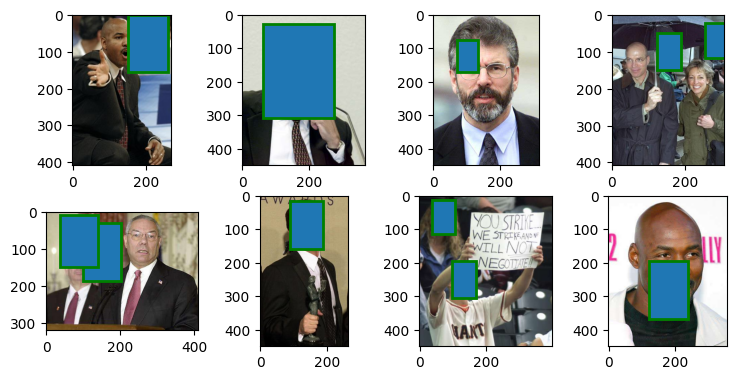

In [51]:
data_path = Path("C:\\Users\\big_b\\.cache\\kagglehub\\datasets\\ngoduy\\dataset-for-face-detection\\versions\\1\\"
                     "Dataset_FDDB\\Dataset_FDDB")

data_transform = transforms.Compose([
    transforms.ToTensor()
])

dataset: FDDBDataset = FDDBDataset(target_dir=data_path, transform=data_transform, target_transform=data_transform)

display_random_items(dataset, 4, 4, 30)

In [38]:
data_path = Path("C:\\Users\\big_b\\.cache\\kagglehub\\datasets\\ngoduy\\dataset-for-face-detection\\versions\\1\\"
                     "Dataset_FDDB\\Dataset_FDDB")

data_transform = transforms.Compose([
    transforms.ToTensor()
])

dataset: FDDBDataset = FDDBDataset(target_dir=data_path, transform=data_transform, target_transform=data_transform)
img_tensor, boxes = dataset[200]
img = img_tensor.cpu().detach().permute(1, 2, 0).numpy()

img = np.ascontiguousarray(img)
for bbox in boxes:
    x1, y1, x2, y2 = bbox
    print(x1, y1, x2, y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

44 41 245 358
